In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#reference:  https://matplotlib.org/stable/users/explain/toolkits/mplot3d.html
from matplotlib import cm
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

from sklearn.cluster import KMeans

# custom import 
import wrangle as w
import model as m
import evaluate as ev

# Modeling

In [2]:
train, val, test= w.wrangle_wine()

In [3]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,...,sulfur_dioxide_percentage,ph_chlorides_ratio,alcohol_sugar_ratio,density_sulfates_ratio,chlorides_sulfates_ratio,residual_sugar_percentage,alcohol_chlorides_ratio,density_sulfur_dioxide_ratio,ph_sulfur_dioxide_ratio,sulfur_dioxide_sugar_ratio
3761,9.9,0.490,0.23,2.4,0.087,19.0,115.0,0.99480,2.77,0.44,...,16.521739,31.839080,3.916667,2.260909,0.197727,2.086957,108.045977,0.008650,0.024087,47.916667
3740,7.7,0.280,0.35,15.3,0.056,31.0,117.0,0.99980,3.27,0.50,...,26.495726,58.392857,0.627451,1.999600,0.112000,13.076923,171.428571,0.008545,0.027949,7.647059
1359,11.6,0.475,0.40,1.4,0.091,6.0,28.0,0.99704,3.07,0.65,...,21.428571,33.736264,7.166667,1.533908,0.140000,5.000000,110.256410,0.035609,0.109643,20.000000
1230,7.7,0.180,0.34,2.7,0.066,15.0,58.0,0.99470,3.37,0.78,...,25.862069,51.060606,4.370370,1.275256,0.084615,4.655172,178.787879,0.017150,0.058103,21.481481
4751,7.6,0.250,1.23,4.6,0.035,51.0,294.0,0.99018,3.03,0.43,...,17.346939,86.571429,2.847826,2.302744,0.081395,1.564626,374.285714,0.003368,0.010306,63.913043


In [4]:
def scale_data(train, val, test, scaler):
    """
    Scales the numerical columns of the data using the specified scaler.

    Args:
        train (pd.DataFrame): Training data.
        val (pd.DataFrame): Validation data.
        test (pd.DataFrame): Test data.
        scaler (sklearn.preprocessing.Scaler): The scaler to use for data scaling.

    Returns:
        tuple: A tuple containing scaled versions of train, validation, and test DataFrames.
    """
    # Make copies for scaling
    train_scaled = train.copy()
    val_scaled = val.copy()
    test_scaled = test.copy()

    columns_to_scale = ['fixed_acidity',
                        'volatile_acidity',
                        'citric_acid',
                        'residual_sugar',
                        'chlorides',
                        'free_sulfur_dioxide',
                        'total_sulfur_dioxide',
                        'density',
                        'ph',
                        'sulphates',
                        'alcohol',
                        'quality',
                       ]
    
    # Fit the scaler on the training data for all of the columns
    scaler.fit(train[columns_to_scale])
    
    # Transform the data for each split
    train_scaled[columns_to_scale] = scaler.transform(train[columns_to_scale])
    val_scaled[columns_to_scale] = scaler.transform(val[columns_to_scale])
    test_scaled[columns_to_scale] = scaler.transform(test[columns_to_scale])

    scaled_col = [train_scaled, val_scaled, test_scaled]
    
    return train_scaled, val_scaled, test_scaled

In [5]:
mms = MinMaxScaler()
train, val, test = scale_data(train, val, test, mms)

In [6]:
train.columns.to_list()

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'ph',
 'sulphates',
 'alcohol',
 'quality',
 'quality_bins',
 'alcohol_bins',
 'total_sulfur_ratio',
 'acidity_level',
 'sugar_alcohol_ratio',
 'chlorides_ph_ratio',
 'density_ph_ratio',
 'sulfur_dioxide_level',
 'sulfates_chlorides_ratio',
 'ph_bins',
 'total_acid',
 'sulfur_dioxide_chlorides_ratio',
 'residual_sugar_ph_ratio',
 'acid_ratio',
 'alcohol_ph_ratio',
 'chlorides_density_ratio',
 'total_sulfur_residual_sugar_ratio',
 'sulfur_dioxide_percentage',
 'ph_chlorides_ratio',
 'alcohol_sugar_ratio',
 'density_sulfates_ratio',
 'chlorides_sulfates_ratio',
 'residual_sugar_percentage',
 'alcohol_chlorides_ratio',
 'density_sulfur_dioxide_ratio',
 'ph_sulfur_dioxide_ratio',
 'sulfur_dioxide_sugar_ratio']

In [7]:
X = train[['density', 'ph']]

In [8]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

kmeans.predict(X)

array([4, 3, 1, ..., 2, 1, 0], dtype=int32)

In [9]:
train['cluster'] = kmeans.predict(X)

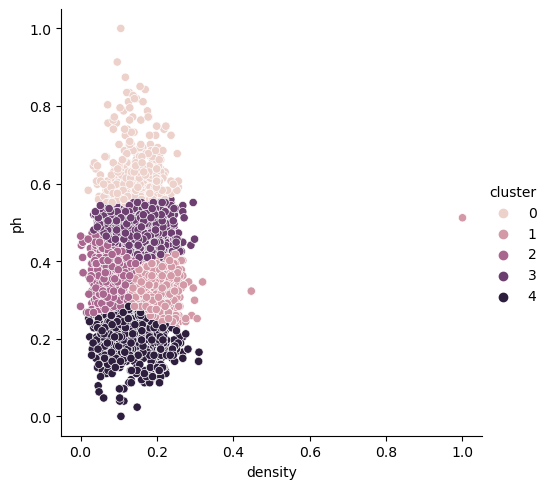

In [10]:
sns.relplot(data=train, x='density', y='ph', hue='cluster')
plt.show()

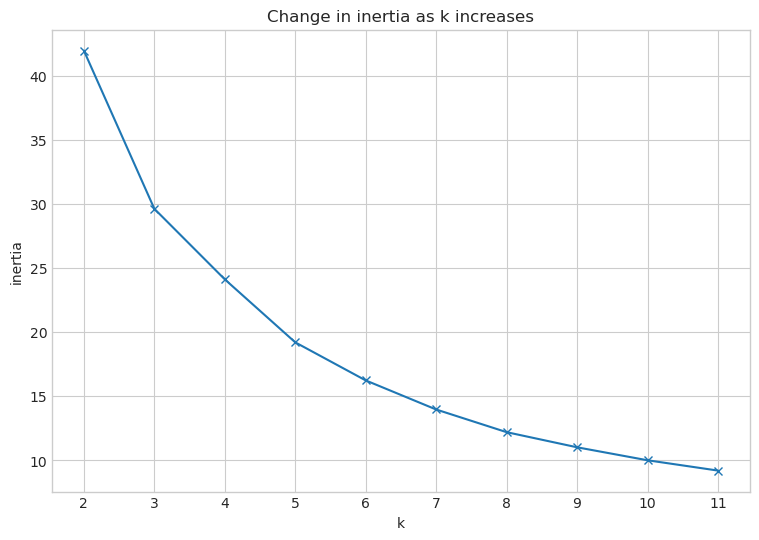

In [11]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [12]:
#module imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from evaluate import plot_residuals, regression_errors, baseline_mean_errors, better_than_baseline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from math import sqrt

#custom imports
import wrangle as w
import evaluate as ev

In [13]:
def eval_model(y_actual, y_hat):
    
    return sqrt(mean_squared_error(y_actual, y_hat))

In [14]:
def train_and_evaluate_model(model, X_train, y_train, X_val, y_val, metrics=['rmse', 'r2'], plot_residuals=False):
    """
    Train a machine learning model and evaluate its performance on training and validation data.
    
    Args:
        model (object): The machine learning model to be trained.
        X_train (array-like): Training feature data.
        y_train (array-like): Training target data.
        X_val (array-like): Validation feature data.
        y_val (array-like): Validation target data.
        metrics (list): List of evaluation metrics to calculate ('rmse', 'r2', etc.).
        plot_residuals (bool): Whether to plot residuals (default is False).
        
    Returns:
        object: The trained model.
        dict: Dictionary containing evaluation metrics.
    """
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Predict on training and validation data
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    
    # Initialize the metrics dictionary
    evaluation_metrics = {}
    
    # Calculate RMSE for training and validation sets
    if 'rmse' in metrics:
        train_rmse = eval_model(y_train, train_preds)
        val_rmse = eval_model(y_val, val_preds)
        evaluation_metrics['train_rmse'] = train_rmse
        evaluation_metrics['val_rmse'] = val_rmse
    
    # Calculate R-squared (R2) for training and validation sets
    if 'r2' in metrics:
        train_r2 = r2_score(y_train, train_preds)
        val_r2 = r2_score(y_val, val_preds)
        evaluation_metrics['train_r2'] = train_r2
        evaluation_metrics['val_r2'] = val_r2
    
    # Plot residuals if requested
    if plot_residuals:
        plot_residuals(y_train, train_preds)
    
    return model, evaluation_metrics

In [15]:
mms = MinMaxScaler()
train_scaled, val_scaled, test_scaled = m.scale_data(train, val, test, mms)

In [16]:
train, val, test = m.find_clusters(train_scaled, val_scaled, test_scaled, 'fixed_acidity', 'residual_sugar', 'density')

In [17]:
d

,3761,3740,1359,1230,4751
fixed_acidity,0.516949,0.330508,0.661017,0.330508,0.322034
volatile_acidity,0.273333,0.133333,0.263333,0.066667,0.113333
citric_acid,0.186992,0.284553,0.325203,0.276423,1.0
residual_sugar,0.027607,0.22546,0.01227,0.032209,0.06135
chlorides,0.129568,0.078073,0.136213,0.094684,0.043189
free_sulfur_dioxide,0.123711,0.206186,0.034364,0.09622,0.343643
total_sulfur_dioxide,0.322485,0.328402,0.065089,0.153846,0.852071
density,0.148255,0.24465,0.19144,0.146327,0.059186
ph,0.023622,0.417323,0.259843,0.496063,0.228346
sulphates,0.125,0.159091,0.244318,0.318182,0.119318


In [18]:
# ------------------------ XY SPLIT FUNCTION ----------------------
# xy_split function to create usable subsets; reusable.
def xy_split(df, col):
    X = df.drop(columns=[col])
    y = df[col]
    return X, y

In [19]:
# X_train, y_train = xy_split(train,'quality')

In [20]:
# X_train

In [21]:
m.baseline_model(train, 'quality', train_scaled, val_scaled, test_scaled, 'fixed_acidity', 'residual_sugar', 'density')


KeyError: "[('quality',)] not found in axis"